---

  <center>
    <font size='4'><b>Machine Learning 1 - Final Project</font><br>
    <font size='6'>Udacity ML Charity Competition</font><br>
  </center>

---

<center>
    <font size='3'>Data Science, Columbian College of Arts & Sciences, George Washington University
    <br>
    Aishwarya M, Deepika R, Satya Phanindra Kumar K.
    </font><br>
</center>

![HelpingHandsImage](https://donatestuff.com/wp-content/uploads/2023/01/donate-clothes-compressor.jpeg)

# Introduction


## Why did we choose this project?

We chose this project because it provides a unique opportunity to apply machine learning to a meaningful and practical problem. By analyzing real-world census data, we aim to help CharityML, a fictitious charity organization, identify potential donors, optimizing their fundraising efforts and making a positive impact. This project not only highlights the potential of data-driven decision-making in addressing societal challenges but also offers a chance to explore various machine learning techniques, such as classification, hyperparameter tuning, and model evaluation. Additionally, its competitive aspect as a Kaggle challenge makes it an engaging and enriching learning experience.

## Introduction of Project

This project leverages supervised machine learning techniques to analyze **U.S. Census data** and help *CharityML*, a fictitious charity organization, identify individuals most likely to donate.

The analysis is carried out in various stages majorily including Data PreProcessing, Hyperparameter Tuning and Model Selection. Various classification models were trained and the model's success is measured using Area Under Curve(AUC) of the ROC (Receiver Operating Characteristic) curve.

NOTE: This is also a [Kaggle competition](https://www.kaggle.com/competitions/udacity-mlcharity-competition)

## Data Source

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult).

<br>

The "Adult" or "Census Income" dataset from the 1994 U.S. Census has 45,222 instances, each with demographic and employment information. The goal is to predict if an individual's annual income exceeds $50,000 as we will be considering income as the factor to identify individuals who are most likely to donate.

**Attributes:**

1. **Age**: Age of the individual.
2. **Workclass**: Type of employment (e.g., Private, Self-emp-not-inc).
3. **Fnlwgt**: Weighting factor for population estimates.
4. **Education**: Highest education level (e.g., Bachelors, HS-grad).
5. **Education-num**: Numeric representation of education level.
6. **Marital-status**: Marital status (e.g., Married-civ-spouse).
7. **Occupation**: Type of occupation (e.g., Tech-support, Sales).
8. **Relationship**: Family relationship (e.g., Husband).
9. **Race**: Race (e.g., White, Asian-Pac-Islander).
10. **Sex**: Gender (Male or Female).
11. **Capital-gain**: Capital gains.
12. **Capital-loss**: Capital losses.
13. **Hours-per-week**: Hours worked per week.
14. **Native-country**: Country of origin (e.g., United-States).

**Target:**

The target variable is **Income**, indicating if annual income is '>50K' or '<=50K'.

## How Machine Learning helps solve this project?

Machine learning plays a pivotal role in this project as it can **identify patterns and insights** from donor information, helping predict which potential donors are likely to contribute. Through iterative experimentation with algorithms like decision trees and random forests, the solution can **adapt to real-world scenarios**. This data-driven approach not only boosts the charity’s operational efficiency but also ensures that resources are allocated where they can make the greatest difference, ultimately amplifying the organization's impact.

# Experiment

## Notebook Configuration

We started off by configuring following settings required for the entire notebook:


### 1. Warnings

All the warnings are set to be "ignored"

In [1]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

### 2. Matplotlib

Required customisations for all the visualizations are set using matplotlib.

In [2]:
import matplotlib.pyplot as plt

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

### 3. TensorFlow

Imported tensorflow and keras libraries as of now. As we move further, other required libraries are imported.

In [3]:
import tensorflow as tf
from tensorflow import keras

### 4. Random seed

Initialised random number generator to ensure reproducibility.

In [4]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Data Preprocessing

As we know that Data preprocessing is vital for high-performing machine learning models since it improves the quality and reliability of data, we followed the basic pipeline for data preprocessing

### Loading the data

Data is downloaded from the source and uploaded onto github repository inorder to avoid any discrepencies in running the code. The data is loaded in this step from the github repository created for this project.

In [5]:
import pandas as pd

# Load the raw training data from github to avoid downloading the data
df_raw_train = pd.read_csv("https://raw.githubusercontent.com/phanindra-max/Machine-Learning-I/refs/heads/main/data/census.csv", header=0)
# Make a copy of df_raw_train
data_train = df_raw_train.copy(deep=True)

# Load the raw test data from github
df_raw_test = pd.read_csv("https://raw.githubusercontent.com/phanindra-max/Machine-Learning-I/refs/heads/main/data/test_census.csv", header=0)
# Make a copy of df_raw_test
data_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'income'

In [6]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,14


*Training Dataset size:*

The training dataset consists of 45,222 rows and 14 columns, representing a substantial collection of records and features for analysis.

In [7]:
# Print the dimension of data_test
pd.DataFrame([[data_test.shape[0], data_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,14


*Test Dataset size:*

The test dataset also contains 45,222 rows and 14 columns, identical in dimensions to the data_train dataset.

In [8]:
# Print the first 5 rows of data_train
data_train.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


*Training Dataset Overview:*

The train dataset contains information on individuals across 14 features, including age, workclass, education, marital status, occupation, race, sex, capital gain, capital loss, hours worked, native country, and income.

In [9]:
# Print the first 5 rows of data_test
data_test.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


*Test Dataset Overview:*

The test dataset contains similar features to data_train, with 14 columns including age, workclass, education_level, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, and native-country.

It also seems to contain an Unnamed column which should be cleaned in later steps.

In [10]:
# gain statistics insight for data_train
data_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


*Highlevel overview of Train Dataset statistics:*

- The train dataset's summary statistics reveal that the average age is 38.55 years, with a minimum of 17 and a maximum of 90.
- The average education level, measured by education-num, is 10.12, indicating most individuals have at least some high school education.
- Most individuals report no capital gain or loss, but the average capital gain is 1,101.43 and the capital loss is 88.60.
- The typical workweek is around 40.94 hours.

In [11]:
# gain statistics insight for data_test
data_test.describe()

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45205.000000,45208.000000,45207.000000,45205.000000,45209.000000
mean,22610.500000,38.549983,10.118519,1099.583781,88.595885,40.939348
std,13054.611273,13.218616,2.552811,7493.227006,404.975547,12.007470
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,11305.250000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,22610.500000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,33915.750000,47.000000,13.000000,0.000000,0.000000,45.000000
max,45221.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


*Highlevel overview of Test Dataset statistics:*

- The average age is 38.55 years, with a range from 17 to 90.

- The average education level is 10.12, indicating that most individuals have at least some high school education.

- The average capital gain is 1,099.58, with many individuals reporting no gain.

- The average capital loss is 88.60, ranging from 0 to 4,356.

- The average workweek is 40.94 hours, with most individuals working around 40 hours.

In [12]:
# Check info for train dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


*Train Dataset Information and datatypes:*

- The train dataset contain non-null values.
- The dataset includes a mix of data types: one integer column (age), four float columns (education-num, capital-gain, capital-loss, hours-per-week), and nine object columns (workclass, education_level, marital-status, occupation, relationship, race, sex, native-country, income).
- This dataset occupies approximately 4.8 MB of memory.

In [13]:
# Check info for test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45222 non-null  int64  
 1   age              45205 non-null  float64
 2   workclass        45200 non-null  object 
 3   education_level  45202 non-null  object 
 4   education-num    45208 non-null  float64
 5   marital-status   45201 non-null  object 
 6   occupation       45200 non-null  object 
 7   relationship     45206 non-null  object 
 8   race             45203 non-null  object 
 9   sex              45203 non-null  object 
 10  capital-gain     45207 non-null  float64
 11  capital-loss     45205 non-null  float64
 12  hours-per-week   45209 non-null  float64
 13  native-country   45206 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


*Test Dataset Information and datatypes:*

- The test dataset contains some missing values in columns such as age, workclass, education_level, and capital-gain.
- The dataset includes one integer column, five float columns, and eight object columns
- The memory usage is approximately 4.8 MB.

### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
data_train, data_val = train_test_split(data_train, train_size=0.8, random_state=random_seed)

# Reset the index
data_train, data_val = data_train.reset_index(drop=True), data_val.reset_index(drop=True)

In [15]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,14


In [16]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,14


The train dataset has been split into 80% training data and 20% validation data. The training dataset now contains 36,177 rows and 14 columns, while the validation dataset has 9,045 rows and 14 columns.

### Handling uncommon features

The uncommon features are identified in this step and are removed if not important

#### Identifying uncommon features

Utilising common var checker function mentioned in class to find common variables between the training, validation and test data.

In [17]:
# Utilising common_var_checker mentioned in class

def common_var_checker(df_train, data_val, df_test, target):
    """
    The common variables checker

    Parameters
    ----------
    df_train : the dataframe of training data
    data_val : the dataframe of validation data
    df_test : the dataframe of test data
    target : the name of the target

    Returns
    ----------
    The dataframe of common variables between the training, validation and test data
    """

    # Get the dataframe of common variables between the training, validation and test data
    df_common_var = pd.DataFrame(np.intersect1d(np.intersect1d(df_train.columns, data_val.columns), np.union1d(df_test.columns, [target])),
                                 columns=['common var'])

    return df_common_var

data_common_var = common_var_checker(data_train, data_val, data_test, target)

# Print df_common_var
data_common_var

,common var
0,age
1,capital-gain
2,capital-loss
3,education-num
4,education_level
5,hours-per-week
6,income
7,marital-status
8,native-country
9,occupation


In [18]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(data_train.columns, data_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


There are 0 features that are in training data but not in validation or test data.

In [19]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(data_val.columns, data_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


There are 0 features that are in the validation data but not in training or test data:

In [20]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(data_test.columns, data_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature
0,Unnamed: 0


There is 1 feature that is in the test data but not in the training or validation data. It is the "Unnamed:0" that we noticed in previous step as well. Let us remove this feature.

#### Removing uncommon features

In [21]:
# Remove the uncommon features from the test data
data_test = data_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of data_test
data_test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


The uncommon feature "Unnamed:0" is removed from the test data.

### Handling identifiers

in this step, we checked for Identifiers, which are unique attributes or variables used to uniquely distinguish records (rows) from one another.

#### Combining the training, validation and test data
Combining the training, validation and test data to look for identifiers

In [22]:
# Combine data_train, data_val and data_test
data = pd.concat([data_train, data_val, data_test], sort=False)

#### Identifying identifiers
Utilising id checker function mentioned in class to check for identifiers

In [23]:
#utilising id-checker as mentioned in class
def id_checker(df, dtype='float'):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    dtype : the data type identifiers cannot have, 'float' by default
            i.e., if a feature has this data type, it cannot be an identifier

    Returns
    ----------
    The dataframe of identifiers
    """

    # Get the dataframe of identifiers
    df_id = df[[var for var in df.columns
                # If the data type is not dtype
                if (df[var].dtype != dtype
                    # If the value is unique for each sample
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]

    return df_id
df_id = id_checker(data)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


Since no identifiers are found in above step, no data manipulation is done on training, validation and test data. Hence we can directly proceed with next step without splitting back the combined data because data_test, data_val and data_train are same from above step and are not changed.

### Handling missing data

In this step, we checked for missing values.

#### Identifying missing values

Utilising NaN checker mentioned in class to find variables with NaN, their proportion of NaN and data type.

In [24]:
# Utilising nan_checker from class
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : the dataframe

    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and data type
    """

    # Get the dataframe of variables with NaN, their proportion of NaN and data type
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])

    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)

    return df_nan

In [25]:
# Checking for missing values in training data
missing_train_df = nan_checker(data_train)
missing_train_df

,var,proportion,dtype


In [26]:
# Checking for missing values in validation data
missing_val_df = nan_checker(data_val)
missing_val_df

,var,proportion,dtype


As observed, there are no missing values in the training and validation datasets. The nan_checker function confirms that all variables are complete, ensuring the datasets are ready for analysis.

In [27]:
# Checking for missing values in test data
missing_test_df = nan_checker(data_test)
missing_test_df

,var,proportion,dtype
0,workclass,0.000486,object
1,occupation,0.000486,object
2,marital-status,0.000464,object
3,education_level,0.000442,object
4,race,0.000420,object
5,sex,0.000420,object
6,age,0.000376,float64
7,capital-loss,0.000376,float64
8,relationship,0.000354,object
9,native-country,0.000354,object


There are null values in test dataset, which we also noticed in above step while checking dataset information. Let us check the type of variables that have missing values.

In [28]:
# Print the unique data type of variables with NaN in test dataframe
pd.DataFrame(missing_test_df['dtype'].unique(), columns=['dtype'])

,dtype
0,object
1,float64


The missing values are of object and float datatype.

In [29]:
# Checking the number of null values in each column
null_counts = data_test.isnull().sum()
print(null_counts)

age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64


Count of Null values in each column are identified as follows:

- age                : 17
- workclass          : 22
- education_level    : 20
- education-num      : 14
- marital-status     : 21
- occupation         : 22
- relationship       : 16
- race               : 19
- sex                : 19
- capital-gain       : 15
- capital-loss       : 17
- hours-per-week     : 13
- native-country     : 16

#### Imputing missing values

Since there are missing values in test data, let us check the distribution of feature data (from train & validation datasets) and impute values based on it.

##### Combining the training and validation data

Combining the training and validation data so that distribution of data can be checked and missing values can be imputed based on it

In [30]:
# Combine data_train, data_val
data_trv = pd.concat([data_train, data_val], sort=False)

##### Identifying categorical and continuous data columns


In [31]:
# Utilising describe method in pandas to find out continuous or numerical variables in the dataframe
continuous = list(data_trv.describe().columns)
print("Non-categorical/continuous columns are:", continuous)

Non-categorical/continuous columns are: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [32]:
## Utilising cat_var_checker as mentioned in class for finding categorical variables
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable

    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """

    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])

    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)

    return df_cat

data_cat = cat_var_checker(data_trv)

# Print the dataframe containing categorical column names and count of unique values
data_cat

,var,nunique
0,native-country,41
1,education_level,16
2,occupation,14
3,workclass,7
4,marital-status,7
5,relationship,6
6,race,5
7,sex,2
8,income,2


In [33]:
categorical = data_cat['var'].tolist()

# checking unique values in each categorical column
for col in data_trv.columns:
    if col in categorical:
        values = list(data_trv[col].value_counts().index)
        print('{}: {}'.format(col, ', '.join(values)))
        print('\n')

workclass:  Private,  Self-emp-not-inc,  Local-gov,  State-gov,  Self-emp-inc,  Federal-gov,  Without-pay


education_level:  HS-grad,  Some-college,  Bachelors,  Masters,  Assoc-voc,  11th,  Assoc-acdm,  10th,  7th-8th,  Prof-school,  9th,  12th,  Doctorate,  5th-6th,  1st-4th,  Preschool


marital-status:  Married-civ-spouse,  Never-married,  Divorced,  Separated,  Widowed,  Married-spouse-absent,  Married-AF-spouse


occupation:  Craft-repair,  Prof-specialty,  Exec-managerial,  Adm-clerical,  Sales,  Other-service,  Machine-op-inspct,  Transport-moving,  Handlers-cleaners,  Farming-fishing,  Tech-support,  Protective-serv,  Priv-house-serv,  Armed-Forces


relationship:  Husband,  Not-in-family,  Own-child,  Unmarried,  Wife,  Other-relative


race:  White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,  Other


sex:  Male,  Female


native-country:  United-States,  Mexico,  Philippines,  Germany,  Puerto-Rico,  Canada,  El-Salvador,  India,  Cuba,  England,  China,  Jamaica,  S

##### Summary of features in terms of datatype:

* **age**: ```continuous```
* **workclass**: ```categorical``` [Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked]
* **education**: ```categorical``` [Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool]
* **education-num**: ```continuous```
* **marital-status**: ```categorical``` [Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse]
* **occupation**: ```categorical``` [Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces]
* **relationship**: ```categorical``` [Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried]
* **race**: ```categorical``` [Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]
* **sex**: ```categorical``` [Female, Male]
* **capital-gain**: ```continuous```
* **capital-loss**: ```continuous```
* **hours-per-week**: ```continuous```
* **native-country**: ```categorical``` [United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands]

##### Distribution check of features

Checking the distribution for deciding about missing values imputation

age skew: 0.5328158942555791
education-num skew: -0.3106209464770188
capital-gain skew: 11.789002180291192
capital-loss skew: 4.516304152981587
hours-per-week skew: 0.34054514378520867


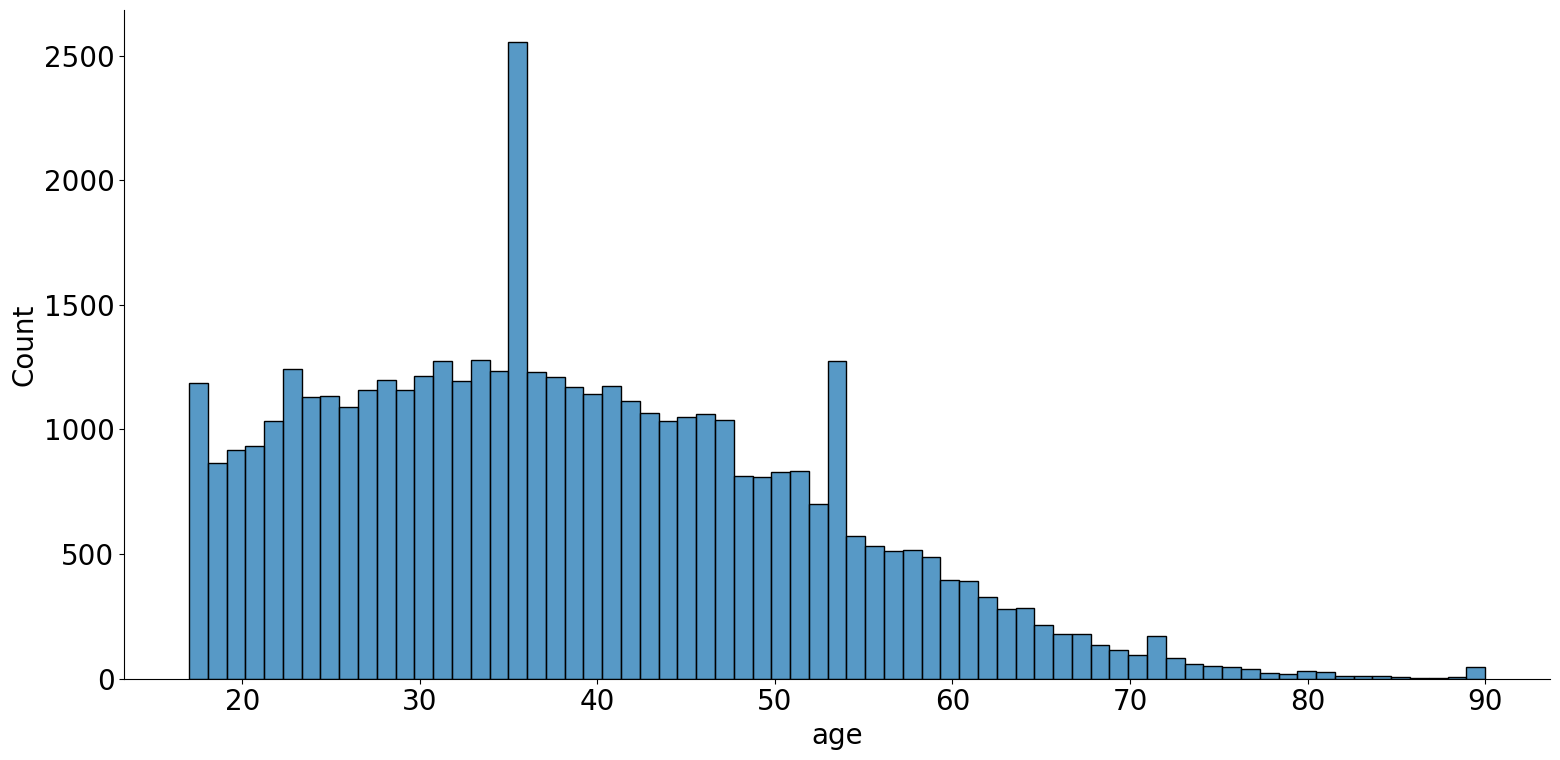

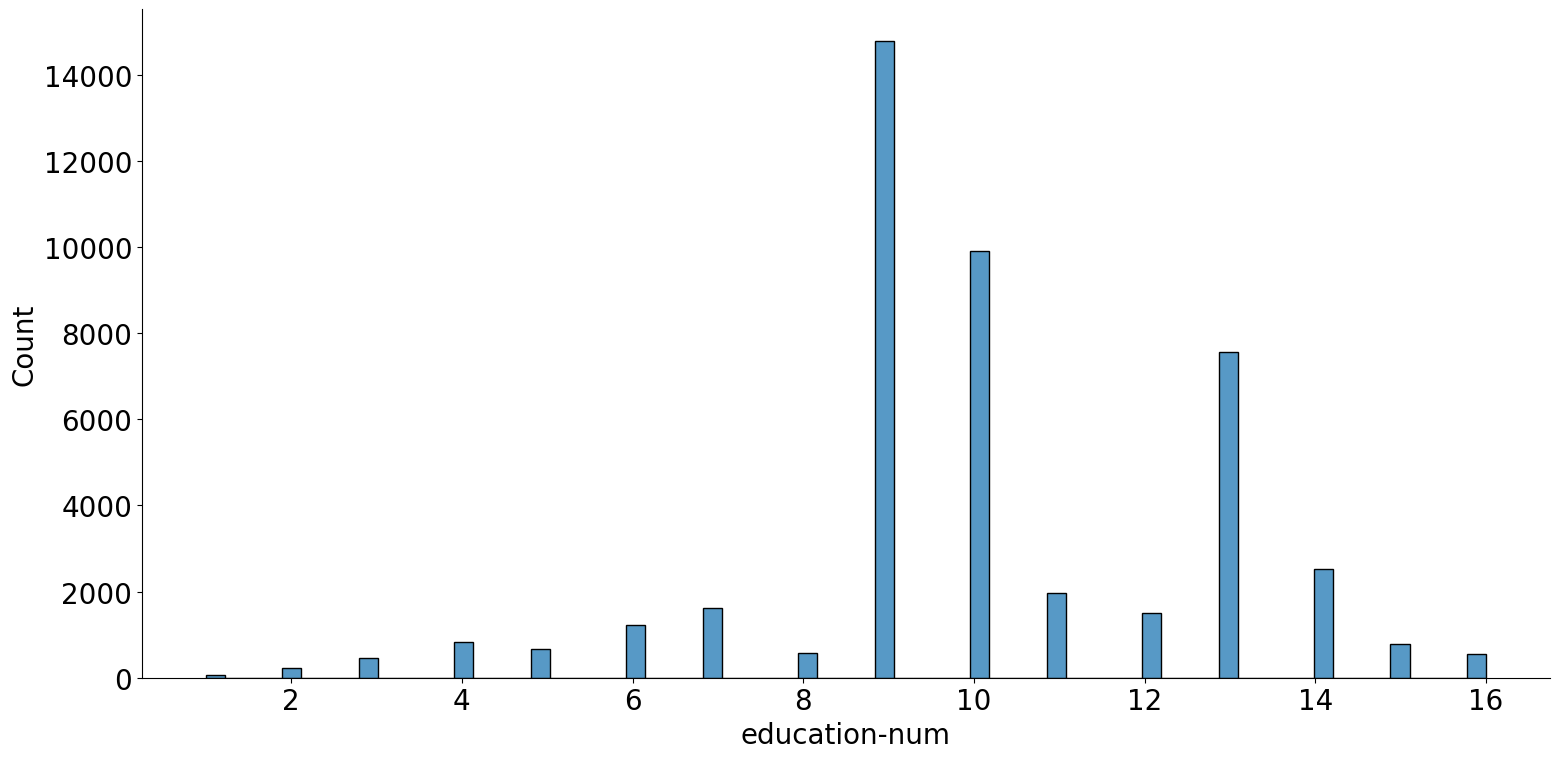

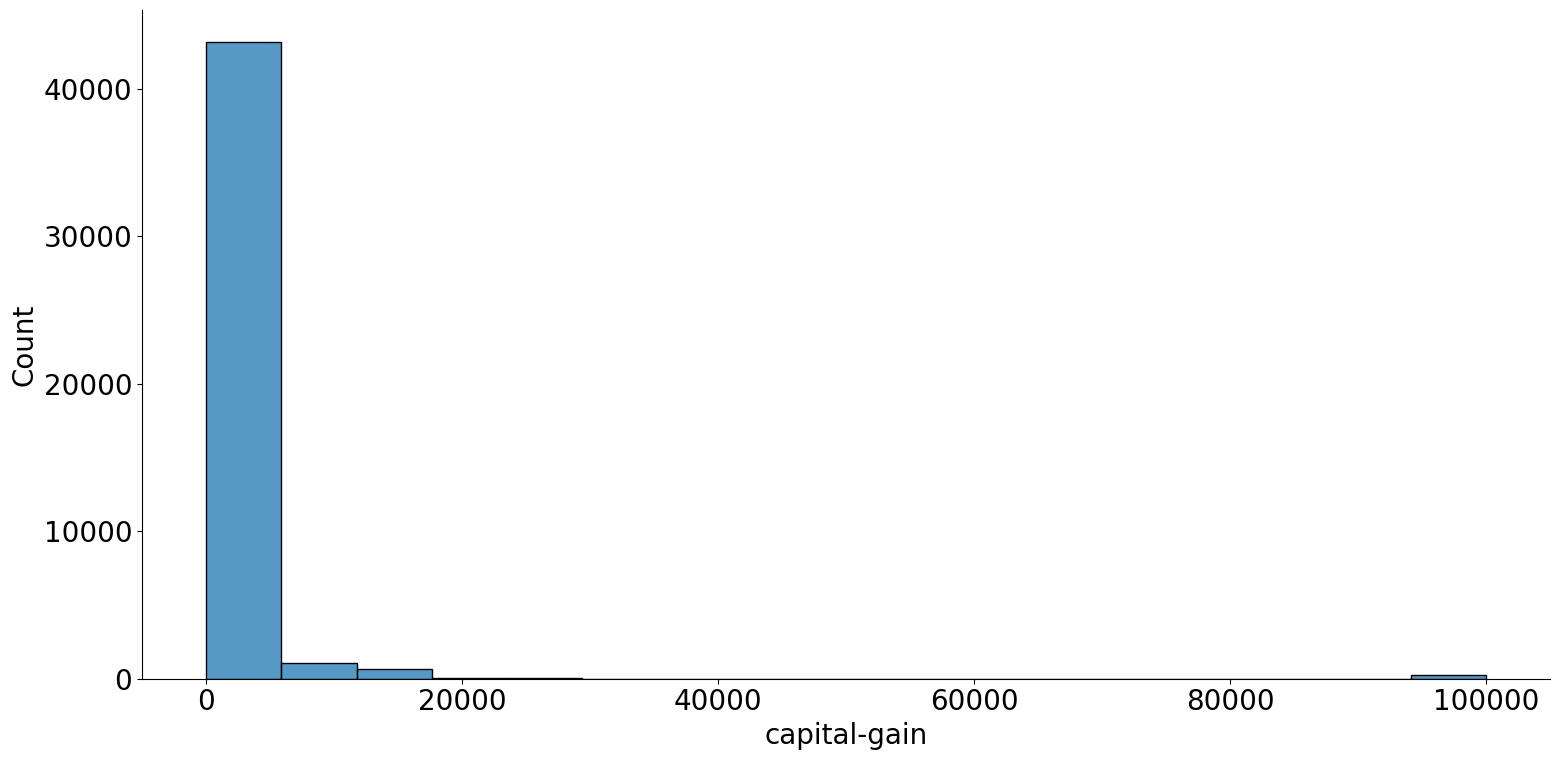

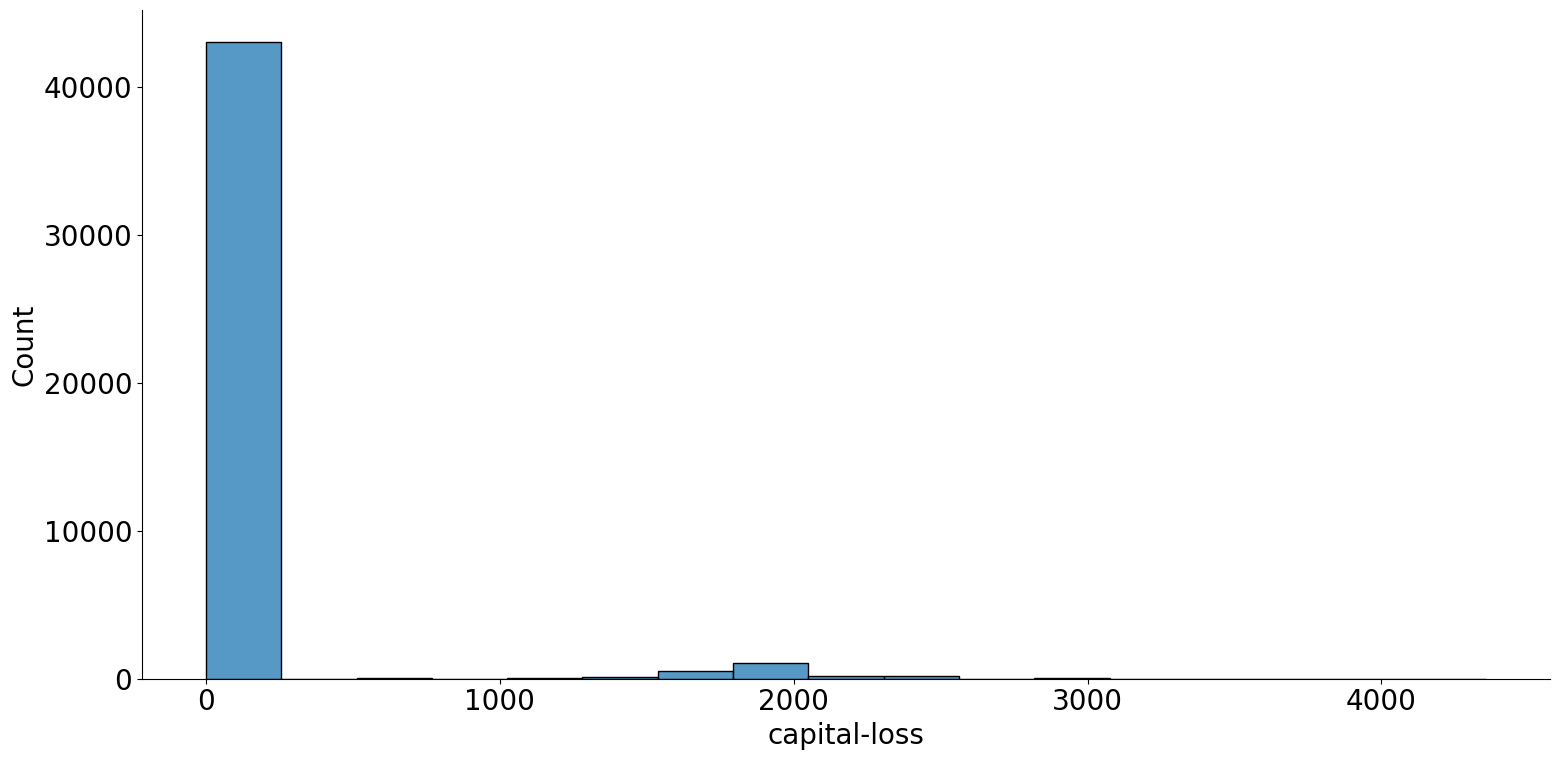

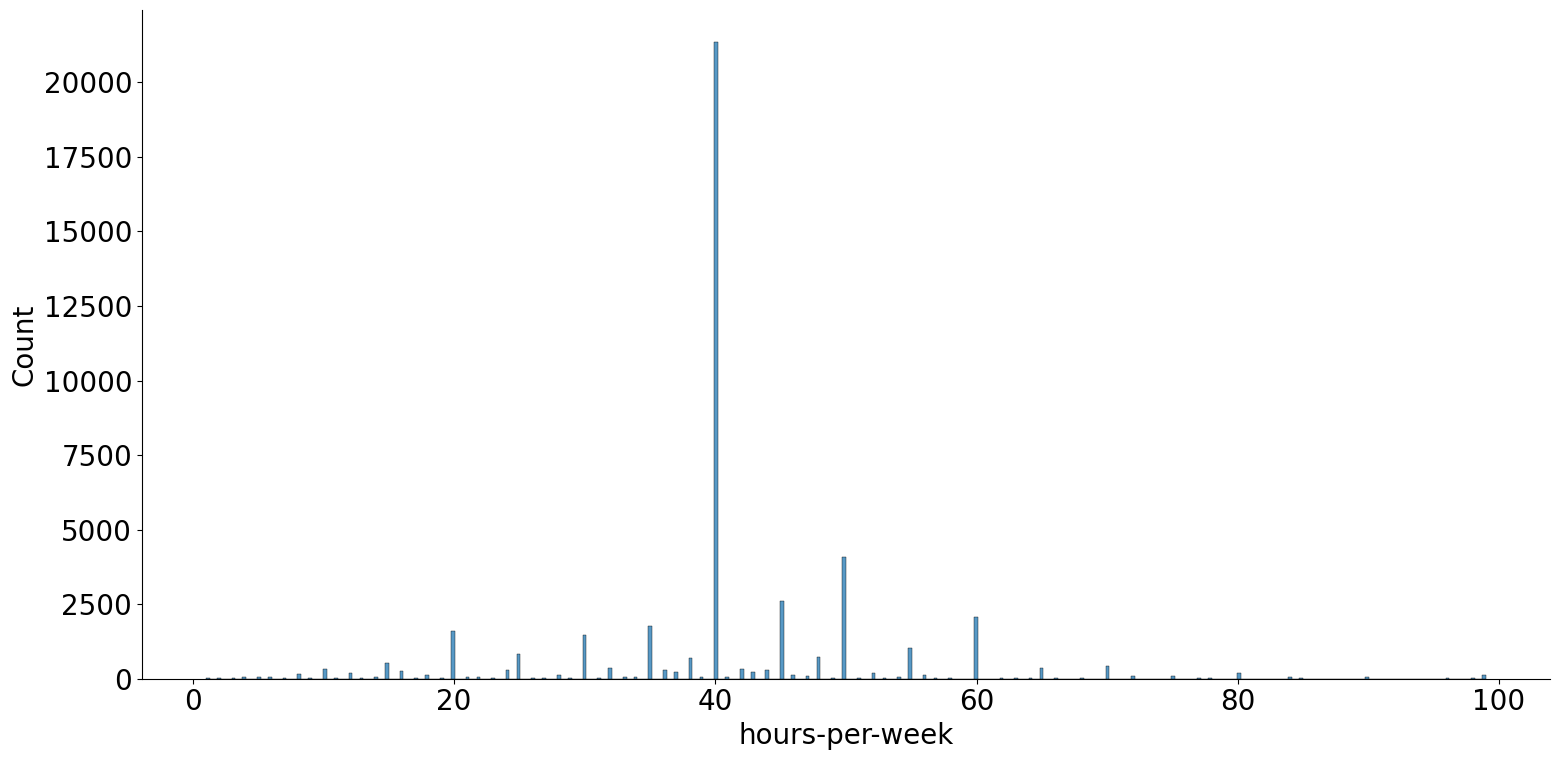

In [34]:
# importing seaborn for visualisations
import seaborn as sns

# check the distributions of continuous features
for col in continuous:
    a = sns.FacetGrid(data_trv, height=8, aspect=2)
    a.map(sns.histplot, col, kde_kws={'bw': 25})
    a.add_legend
    print('{} skew: {}'.format(col, data_trv[col].skew()))

From the above skew and graphs, we can see that 'capital-loss' and 'capital-gain' features are highly skewed and so let us try to apply log transformation for these two variables such that they do not negatively affect the classification results.

##### Log-transform highly skewed features

In [39]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = data_trv)
features_log_transformed[skewed] = data_trv[skewed].apply(lambda x: np.log(x + 1))

In [40]:
# checking the skew after applying log transformation
for col in skewed:
    print('{} skew: {}'.format(col, features_log_transformed[col].skew()))

capital-gain skew: 3.0823859202151755
capital-loss skew: 4.271194769830899


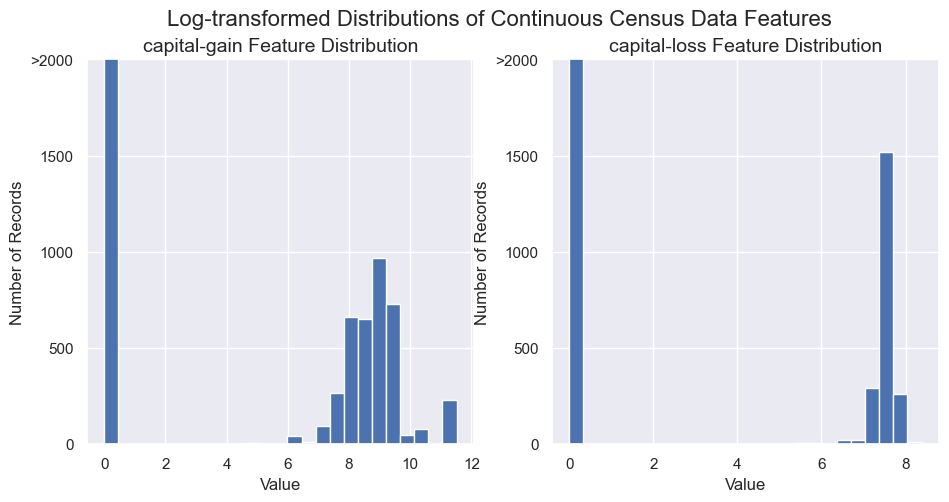

In [41]:
# Displaying the distributions after log-transform
sns.set()
fig = plt.figure(figsize=(11,5))
fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", fontsize=16)

for i, feature in enumerate(skewed):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(features_log_transformed[feature], bins=25)
    ax.set_title("{} Feature Distribution".format(feature), fontsize=14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0,2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

##### Splitting train and validation data

In [42]:
# Separating the training data
data_train = data_trv.iloc[:data_train.shape[0], :]

# Separating the validation data
data_val = data_trv.iloc[data_train.shape[0]:data_train.shape[0] + data_val.shape[0], :]

In [43]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,14


In [44]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,14


The data is now splitted back to training and validation data of 36,177 rows * 14 columns and 9,045 rows * 14 columns respectively.

##### Imputing the null values

In [45]:
print(f'Continuous data columns: {continuous}')
print("----")
print(f'Skewed data columns: {skewed}')
print("----")
print(f'Categorical data columns: {categorical}')
print("----")
cat_nottarget = [item for item in categorical if item != target]
print(f'Categorical without target data columns: {cat_nottarget}')
print("----")
cont_notskewed = list(set(continuous) - set(skewed))
print(f'Continuous but not skewed data columns: {cont_notskewed}')


Continuous data columns: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
----
Skewed data columns: ['capital-gain', 'capital-loss']
----
Categorical data columns: ['native-country', 'education_level', 'occupation', 'workclass', 'marital-status', 'relationship', 'race', 'sex', 'income']
----
Categorical without target data columns: ['native-country', 'education_level', 'occupation', 'workclass', 'marital-status', 'relationship', 'race', 'sex']
----
Continuous but not skewed data columns: ['education-num', 'hours-per-week', 'age']


In [46]:
from sklearn.impute import SimpleImputer

# for imputing missing values with mean for continuous features except skewed data columns
mean_imputer = SimpleImputer(strategy='mean')

# for imputing missing values with median for skewed features
median_imputer = SimpleImputer(strategy='median')

# for imputing missing values with mode for categorical features
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

data_test[cont_notskewed] = mean_imputer.fit_transform(data_test[cont_notskewed])
data_test[skewed] = median_imputer.fit_transform(data_test[skewed])
data_test[cat_nottarget] = most_frequent_imputer.fit_transform(data_test[cat_nottarget])

Based on the distribution of data, null values for continuous non-skewed features are imputed with mean, skewed features with the median, and categorical features with the most frequent value.

### Scaling the data

Since the numeric variables contain data of various ranges, we scaled it using Min Max Scaler

#### Standardization


In [47]:
# Importing Min Max Scaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

# Standardize the training data
data_train[continuous] = scaler.fit_transform(data_train[continuous])

# Standardize the validation data
data_val[continuous] = scaler.fit_transform(data_val[continuous])

# Standardize the test data
data_test[continuous] = scaler.fit_transform(data_test[continuous])

### Encoding the data

In this step, we encoded the categorical data and target as well.

#### Combining the training, validation and test data

In [48]:
# Combine data_train, data_val and data_test
data = pd.concat([data_train, data_val, data_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(data.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object


#### Identifying categorical variables

Since we already found this in above step, just printing the categorical variables here.

In [50]:
# categorical variables are already identified in above step
data_cat

,var,nunique
0,native-country,41
1,education_level,16
2,occupation,14
3,workclass,7
4,marital-status,7
5,relationship,6
6,race,5
7,sex,2
8,income,2


#### Encoding categorical features

Using One hot enconding for categorical features

In [51]:
# One-hot-encode the categorical features in the combined data
data = pd.get_dummies(data, columns= cat_nottarget)
# Print the first 5 rows of df
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.205479,0.800000,0.0,0.0,0.397959,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0.383562,0.733333,0.0,0.0,0.663265,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,0.383562,0.400000,0.0,0.0,0.500000,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,0.301370,0.533333,0.0,0.0,0.704082,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,0.465753,0.533333,0.0,0.0,0.377551,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


#### Encoding categorical target

We tried to encode target using inbuilt encoding techniques but based on the features of the dataset, the target variable was somehow encoded into 3 or more classes which is not desired in our case, hence we proceeded with manual encoding of target. We encoded the categorical target with "0" for income less than or equal to 50k and "1" for income more than 50k.

In [52]:
data['income'] = data['income'].map({"<=50K":0, ">50K":1})

In [53]:
data['income'].unique()

array([ 0.,  1., nan])

After encoding, the unique values in the income column are 0, 1, and NaN, with the NaN representing missing income data in the test set, this is an expected outcome.

#### Separating the training, validation and test data
Let us now separate the training, validation and test data back.

In [54]:
# Separating the training data
data_train = data.iloc[:data_train.shape[0], :]

# Separating the validation data
data_val = data.iloc[data_train.shape[0]:data_train.shape[0] + data_val.shape[0], :]

# Separating the test data
data_test = data.iloc[data_train.shape[0] + data_val.shape[0]:, :]

In [55]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,104


In [56]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,104


In [57]:
# Print the dimension of data_test
pd.DataFrame([[data_test.shape[0], data_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,104


### Splitting the feature and target

The data is now split into feature and target before proceeding to modelling stage.

In [58]:
# Get the feature matrix
X_train = data_train[np.setdiff1d(data_train.columns, [target])].values
X_val = data_val[np.setdiff1d(data_val.columns, [target])].values
X_test = data_test[np.setdiff1d(data_test.columns, [target])].values

# Get the target vector
y_train = data_train[target].values
y_val = data_val[target].values
y_test = data_test[target].values

In [59]:
data_test['income'].unique()

array([nan])


The dataset is now split into features (X_train, X_val, X_test) and target (y_train, y_val, y_test) by excluding the target column from the feature matrix. The income column in the data_test contains only nan, indicating missing target values in the test data.

### Class Imbalance

In [60]:
pd.Series(y_train).value_counts()

0.0    27269
1.0     8908
Name: count, dtype: int64

- Class 0 and 1 are in 3:1 ratio, which is not a severe class imbalance.
- Additionally, the for using techniques like SMOTE, we need to use a different library called imbalanced-learn which is not covered in class.
- Hence, we can proceed with the modelling without any class imbalance handling techniques.

## Hyperparameter Tuning

In this stage, we decided to follow pipeline method for hyperparameter tuning and modelling as it allows reusability of code and have a maintained flow. We created pipeline of models that we would like to test and then implemented tuning, modeling etc methods on this pipeline.  

### Creating the dictionary of the models

Since, target is a binary(2 classes) variable, we wanted to check how most common classification models work for this dataset and find out which one works best for this project. Hence, we implemented following classification models:

- Gaussian Naive Bayes
- KNeighbors Classifier
- Logistic Regression Classifer
- Decision Tree Classifier
- Random Forest Classifier
- GradientBoosting Classifier
- AdaBoost Classifier

In [61]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

models = {'Gaussian Naive Bayes' : GaussianNB(),
          'KNeighbors Classifier' : KNeighborsClassifier(),
          'Logistic Regression Classifer': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'Decision Tree Classifier' : DecisionTreeClassifier(class_weight='balanced', random_state=random_seed),
          'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'GradientBoosting Classifier' : GradientBoostingClassifier(random_state = random_seed),
          'AdaBoost Classifier' : AdaBoostClassifier(random_state = random_seed, learning_rate=0.5, n_estimators=100)
          }

### Creating the dictionary of the pipelines

In [62]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

### Getting the predefined split cross-validator

Utilised Predefined split cross-validator from sklearn to se

Provides train/test indices to split data into train/test sets using a predefined scheme specified by the user with the test_fold parameter.

In [63]:
# utilising function defined in class for predefined split cross-validator

from sklearn.model_selection import PredefinedSplit

def get_train_val_ps(X_train, y_train, X_val, y_val):
    """
    Get the:
    feature matrix and target velctor in the combined training and validation data
    target vector in the combined training and validation data
    PredefinedSplit

    Parameters
    ----------
    X_train : the feature matrix in the training data
    y_train : the target vector in the training data
    X_val : the feature matrix in the validation data
    y_val : the target vector in the validation data

    Return
    ----------
    The feature matrix in the combined training and validation data
    The target vector in the combined training and validation data
    PredefinedSplit
    """

    # Combine the feature matrix in the training and validation data
    X_train_val = np.vstack((X_train, X_val))

    # Combine the target vector in the training and validation data
    y_train_val = np.vstack((y_train.reshape(-1, 1), y_val.reshape(-1, 1))).reshape(-1)

    # Get the indices of training and validation data
    train_val_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_val.shape[0], 0))

    # The PredefinedSplit
    ps = PredefinedSplit(train_val_idxs)

    return X_train_val, y_train_val, ps


# calling the function for obtaining predefined split cross validator
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)


### GridSearchCV

#### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [64]:
param_grids = {}

##### The parameter grid for Gaussian Naive Bayes

The hyper parameter we want to finetune here are:

- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [65]:
# The parameter grid for var_smoothing
var_smoothing_gnbc = np.logspace(-12, -6, num=7)

# Update param_grids
param_grids['Gaussian Naive Bayes'] = [{'model__var_smoothing' : var_smoothing_gnbc}]

##### The parameter grid for LogisticRegression
The hyperparameters we want to fine-tune are:

- tol: Tolerance for stopping criteria
- C: Inverse of regularization strength


In [66]:
# The parameter grid for tol
tol_lr = [10 ** -6, 10 ** -5, 10 ** -4]

# The parameter grid for C
C_lr = [8, 10, 13, 15]

# Update param_grids
param_grids['Logistic Regression Classifer'] = [{'model__tol': tol_lr,
                      'model__C': C_lr}]

##### The parameter grid for KNeighbors Classification

The hyperparameters we want to finetune here are:

- n_neighbors: Number of neighbors to use by default for kneighbors queries
- weights: Weight function used in prediction
- metric: Metric to use for distance computation

In [67]:
# The parameter grid for n_neighbors
n_neighbors_knbc = [10, 20, 30]

# The parameter grid for weights
weights_knbc = ['uniform', 'distance']

# The parameter grid for metric
metric_knbc = ['euclidean', 'manhattan']

# Update param_grids
param_grids['KNeighbors Classifier'] = [{'model__n_neighbors': n_neighbors_knbc,
                        'model__weights': weights_knbc,
                        'model__metric': metric_knbc}]

We tried the Minkowski metric as well, it took so much time to run and the results were also not satisfactory, so we decided to remove it.

After experimenting with different values, We found that tol values of 10e-7 and 10e-3 did not produce favorable results, while a tol value of 10 worked well. Similarly, adjustments to C showed better performance with higher values, and the chosen values reflect the best results from this experimentation.

##### The parameter grid for Decision Tree Classifier
The hyperparameters we want to fine-tune are:

- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf: The minimum number of samples required to be at a leaf node

In [68]:
# The parameter grid for min_samples_split
min_samples_split_dtc = [2, 5, 10]

# The parameter grid for min_samples_leaf
min_samples_leaf_dtc = [50, 75, 100]

# Update param_grids
param_grids['Decision Tree Classifier'] = [{'model__min_samples_split': min_samples_split_dtc,
                       'model__min_samples_leaf': min_samples_leaf_dtc}]

##### The parameter grid for Random Forest
The hyperparameters we want to fine-tune are:

- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf: The minimum number of samples required to be at a leaf node



In [69]:
# The parameter grid for min_samples_split
min_samples_split_rfc = [10, 50, 100]

# The parameter grid for min_samples_leaf
min_samples_leaf_rfc = [0.9, 1, 3, 5]

# Update param_grids
param_grids['Random Forest Classifier'] = [{'model__min_samples_split': min_samples_split_rfc,
                       'model__min_samples_leaf': min_samples_leaf_rfc}]

##### The parameter grid for Adaboost Classifier

The hyperparameters we want to fine-tune are:

- n_estimators: The maximum number of estimators at which boosting is terminated


In [70]:
# The parameter grid for n_estimators
n_estimators_abc = list(range(50, 201, 25))

# Update param_grids
param_grids['AdaBoost Classifier'] = [{ 'model__n_estimators': n_estimators_abc}]

##### The parameter grid for Gradient Boosting
The hyperparameters we want to fine-tune are:

- n_estimators: The number of boosting stages to perform
- learning_rate: Learning rate shrinks the contribution of each tree by learning_rate
- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf: The minimum number of samples required to be at a leaf node
- max depth: Maximum depth of the individual regression estimators
- subsample: The fraction of samples to be used for fitting the individual base learners


In [71]:
# The parameter grid for n_estimators
n_estimators_gbc = [40]

# The parameter grid for learning_rate
learning_rate_gbc = [0.3]

# The parameter grid for min_samples_split
min_samples_split_gbc = [100, 250, 500]

# The parameter grid for min_samples_leaf
min_samples_leaf_gbc = [25, 50, 75, 100]

# The parameter grid for max_depth
max_depth_gbc = [8]

# The parameter grid for subsample
subsample_gbc = [0.8]

# update param_grids
param_grids['GradientBoosting Classifier'] = [{'model__n_estimators': n_estimators_gbc,
                       'model__learning_rate': learning_rate_gbc,
                       'model__min_samples_split': min_samples_split_gbc,
                       'model__min_samples_leaf' : min_samples_leaf_gbc,
                       'model__max_depth' : max_depth_gbc,
                       'model__subsample' : subsample_gbc}]

#### Tuning the hyperparameters

Finetuning the hyperparameters using gridsearchcv

In [73]:
from sklearn.model_selection import GridSearchCV
import time
from IPython.display import display

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():

    print(f"{acronym}:")

    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True,
                      verbose=1)

    print(f'parameter tuning started for {acronym}')
    start_time = time.time()

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # print estimator status
    print(f'Parameter tuning is done for {acronym}')

    # calculating time taken by each classifier for parameter tuning
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for {acronym}: {execution_time:.4f} seconds \n")

    # display cv_results
    display(cv_results)

    # adding line space before displaying next estimator status
    print("\n----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")


Gaussian Naive Bayes:
parameter tuning started for Gaussian Naive Bayes
Fitting 1 folds for each of 7 candidates, totalling 7 fits
parameter tuning is done for Gaussian Naive Bayes
Execution time for Gaussian Naive Bayes: 14.4234 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__var_smoothing,params,split0_test_score,split0_train_score
6,1,0.647918,0.0,0.637177,0.0,0.379757,0.0,0.097295,0.0,1.000000e-06,{'model__var_smoothing': 1e-06},0.647918,0.637177
5,2,0.642795,0.0,0.630785,0.0,0.376689,0.0,0.103988,0.0,1.000000e-07,{'model__var_smoothing': 1e-07},0.642795,0.630785
4,3,0.634789,0.0,0.624228,0.0,0.387347,0.0,0.094557,0.0,1.000000e-08,{'model__var_smoothing': 1e-08},0.634789,0.624228
3,4,0.627703,0.0,0.618466,0.0,0.388257,0.0,0.091999,0.0,1.000000e-09,{'model__var_smoothing': 1e-09},0.627703,0.618466
2,5,0.623973,0.0,0.613738,0.0,0.381570,0.0,0.099963,0.0,1.000000e-10,{'model__var_smoothing': 1e-10},0.623973,0.613738
1,6,0.619126,0.0,0.610720,0.0,0.409310,0.0,0.100852,0.0,1.000000e-11,{'model__var_smoothing': 1e-11},0.619126,0.610720
0,7,0.616548,0.0,0.607055,0.0,0.431133,0.0,0.103872,0.0,1.000000e-12,{'model__var_smoothing': 1e-12},0.616548,0.607055



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighbors Classifier:
parameter tuning started for KNeighbors Classifier
Fitting 1 folds for each of 12 candidates, totalling 12 fits
parameter tuning is done for KNeighbors Classifier
Execution time for KNeighbors Classifier: 323.0717 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__metric,param_model__n_neighbors,param_model__weights,params,split0_test_score,split0_train_score
8,1,0.756003,0.0,0.774393,0.0,0.299856,0.0,17.556792,0.0,manhattan,20,uniform,"{'model__metric': 'manhattan', 'model__n_neigh...",0.756003,0.774393
4,2,0.755242,0.0,0.769807,0.0,0.304254,0.0,2.657198,0.0,euclidean,30,uniform,"{'model__metric': 'euclidean', 'model__n_neigh...",0.755242,0.769807
2,3,0.754691,0.0,0.776388,0.0,0.294327,0.0,2.305319,0.0,euclidean,20,uniform,"{'model__metric': 'euclidean', 'model__n_neigh...",0.754691,0.776388
10,4,0.754428,0.0,0.769568,0.0,0.306674,0.0,20.147183,0.0,manhattan,30,uniform,"{'model__metric': 'manhattan', 'model__n_neigh...",0.754428,0.769568
5,5,0.754354,0.0,0.961486,0.0,0.313621,0.0,1.913572,0.0,euclidean,30,distance,"{'model__metric': 'euclidean', 'model__n_neigh...",0.754354,0.961486
3,6,0.753519,0.0,0.961486,0.0,0.314238,0.0,2.101413,0.0,euclidean,20,distance,"{'model__metric': 'euclidean', 'model__n_neigh...",0.753519,0.961486
1,7,0.753397,0.0,0.961453,0.0,0.310976,0.0,2.289202,0.0,euclidean,10,distance,"{'model__metric': 'euclidean', 'model__n_neigh...",0.753397,0.961453
7,8,0.751266,0.0,0.961398,0.0,0.317791,0.0,16.956234,0.0,manhattan,10,distance,"{'model__metric': 'manhattan', 'model__n_neigh...",0.751266,0.961398
11,9,0.750819,0.0,0.961434,0.0,0.327297,0.0,19.701443,0.0,manhattan,30,distance,"{'model__metric': 'manhattan', 'model__n_neigh...",0.750819,0.961434
9,10,0.750659,0.0,0.961434,0.0,0.329641,0.0,16.851926,0.0,manhattan,20,distance,"{'model__metric': 'manhattan', 'model__n_neigh...",0.750659,0.961434



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression Classifer:
parameter tuning started for Logistic Regression Classifer
Fitting 1 folds for each of 12 candidates, totalling 12 fits
parameter tuning is done for Logistic Regression Classifer
Execution time for Logistic Regression Classifer: 13.7954 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__tol,params,split0_test_score,split0_train_score
8,1,0.782308,0.0,0.771391,0.0,1.069570,0.0,0.081710,0.0,13,0.000100,"{'model__C': 13, 'model__tol': 0.0001}",0.782308,0.771391
9,2,0.782200,0.0,0.771751,0.0,1.282841,0.0,0.081191,0.0,15,0.000001,"{'model__C': 15, 'model__tol': 1e-06}",0.782200,0.771751
10,2,0.782200,0.0,0.771751,0.0,1.163401,0.0,0.080781,0.0,15,0.000010,"{'model__C': 15, 'model__tol': 1e-05}",0.782200,0.771751
3,4,0.782048,0.0,0.771667,0.0,1.255579,0.0,0.080100,0.0,10,0.000001,"{'model__C': 10, 'model__tol': 1e-06}",0.782048,0.771667
4,4,0.782048,0.0,0.771667,0.0,1.202627,0.0,0.083801,0.0,10,0.000010,"{'model__C': 10, 'model__tol': 1e-05}",0.782048,0.771667
6,4,0.782048,0.0,0.771674,0.0,1.269719,0.0,0.084893,0.0,13,0.000001,"{'model__C': 13, 'model__tol': 1e-06}",0.782048,0.771674
7,4,0.782048,0.0,0.771674,0.0,1.324889,0.0,0.074975,0.0,13,0.000010,"{'model__C': 13, 'model__tol': 1e-05}",0.782048,0.771674
5,8,0.782004,0.0,0.771406,0.0,1.181958,0.0,0.073998,0.0,10,0.000100,"{'model__C': 10, 'model__tol': 0.0001}",0.782004,0.771406
0,9,0.781940,0.0,0.771483,0.0,1.292065,0.0,0.085060,0.0,8,0.000001,"{'model__C': 8, 'model__tol': 1e-06}",0.781940,0.771483
1,9,0.781940,0.0,0.771483,0.0,1.283777,0.0,0.076038,0.0,8,0.000010,"{'model__C': 8, 'model__tol': 1e-05}",0.781940,0.771483



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Decision Tree Classifier:
parameter tuning started for Decision Tree Classifier
Fitting 1 folds for each of 9 candidates, totalling 9 fits
parameter tuning is done for Decision Tree Classifier
Execution time for Decision Tree Classifier: 10.1258 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split0_train_score
6,1,0.777969,0.0,0.771858,0.0,0.867442,0.0,0.092811,0.0,100,2,"{'model__min_samples_leaf': 100, 'model__min_s...",0.777969,0.771858
7,1,0.777969,0.0,0.771858,0.0,0.859294,0.0,0.091540,0.0,100,5,"{'model__min_samples_leaf': 100, 'model__min_s...",0.777969,0.771858
8,1,0.777969,0.0,0.771858,0.0,0.865197,0.0,0.089550,0.0,100,10,"{'model__min_samples_leaf': 100, 'model__min_s...",0.777969,0.771858
0,4,0.777925,0.0,0.783718,0.0,0.981501,0.0,0.093147,0.0,50,2,"{'model__min_samples_leaf': 50, 'model__min_sa...",0.777925,0.783718
1,4,0.777925,0.0,0.783718,0.0,0.961483,0.0,0.096464,0.0,50,5,"{'model__min_samples_leaf': 50, 'model__min_sa...",0.777925,0.783718
2,4,0.777925,0.0,0.783718,0.0,0.942235,0.0,0.088434,0.0,50,10,"{'model__min_samples_leaf': 50, 'model__min_sa...",0.777925,0.783718
3,7,0.772367,0.0,0.773796,0.0,0.899635,0.0,0.091227,0.0,75,2,"{'model__min_samples_leaf': 75, 'model__min_sa...",0.772367,0.773796
4,7,0.772367,0.0,0.773796,0.0,0.889618,0.0,0.089375,0.0,75,5,"{'model__min_samples_leaf': 75, 'model__min_sa...",0.772367,0.773796
5,7,0.772367,0.0,0.773796,0.0,0.876765,0.0,0.089456,0.0,75,10,"{'model__min_samples_leaf': 75, 'model__min_sa...",0.772367,0.773796



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Random Forest Classifier:
parameter tuning started for Random Forest Classifier
Fitting 1 folds for each of 12 candidates, totalling 12 fits
parameter tuning is done for Random Forest Classifier
Execution time for Random Forest Classifier: 56.4181 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split0_train_score
4,1,0.796564,0.0,0.825241,0.0,7.907782,0.0,0.342230,0.0,1.0,50,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.796564,0.825241
3,2,0.795629,0.0,0.889979,0.0,8.937105,0.0,0.609509,0.0,1.0,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.795629,0.889979
5,3,0.792938,0.0,0.808658,0.0,6.771765,0.0,0.312607,0.0,1.0,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.792938,0.808658
6,4,0.792703,0.0,0.811290,0.0,6.899589,0.0,0.333296,0.0,3.0,10,"{'model__min_samples_leaf': 3, 'model__min_sam...",0.792703,0.811290
7,5,0.787059,0.0,0.799534,0.0,6.546571,0.0,0.308208,0.0,3.0,50,"{'model__min_samples_leaf': 3, 'model__min_sam...",0.787059,0.799534
10,6,0.786269,0.0,0.793671,0.0,6.211970,0.0,0.292277,0.0,5.0,50,"{'model__min_samples_leaf': 5, 'model__min_sam...",0.786269,0.793671
9,7,0.785388,0.0,0.797029,0.0,6.308431,0.0,0.304378,0.0,5.0,10,"{'model__min_samples_leaf': 5, 'model__min_sam...",0.785388,0.797029
11,8,0.785314,0.0,0.790501,0.0,5.889360,0.0,0.295417,0.0,5.0,100,"{'model__min_samples_leaf': 5, 'model__min_sam...",0.785314,0.790501
8,9,0.785163,0.0,0.794564,0.0,6.335297,0.0,0.297688,0.0,3.0,100,"{'model__min_samples_leaf': 3, 'model__min_sam...",0.785163,0.794564
0,10,0.202732,0.0,0.197582,0.0,1.190608,0.0,0.116312,0.0,0.9,10,"{'model__min_samples_leaf': 0.9, 'model__min_s...",0.202732,0.197582



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoosting Classifier:
parameter tuning started for GradientBoosting Classifier
Fitting 1 folds for each of 12 candidates, totalling 12 fits
parameter tuning is done for GradientBoosting Classifier
Execution time for GradientBoosting Classifier: 115.6676 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,param_model__subsample,params,split0_test_score,split0_train_score
5,1,0.802002,0.0,0.826607,0.0,15.609517,0.0,0.113195,0.0,0.3,8,50,500,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.802002,0.826607
6,2,0.799953,0.0,0.828675,0.0,16.030082,0.0,0.127792,0.0,0.3,8,75,100,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.799953,0.828675
3,3,0.799014,0.0,0.831488,0.0,15.889738,0.0,0.126426,0.0,0.3,8,50,100,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.799014,0.831488
8,4,0.799002,0.0,0.823248,0.0,15.816695,0.0,0.133854,0.0,0.3,8,75,500,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.799002,0.823248
10,5,0.798920,0.0,0.825210,0.0,15.548301,0.0,0.118578,0.0,0.3,8,100,250,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.798920,0.825210
9,6,0.798621,0.0,0.825271,0.0,16.239428,0.0,0.127721,0.0,0.3,8,100,100,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.798621,0.825271
0,7,0.797362,0.0,0.836347,0.0,15.612346,0.0,0.119872,0.0,0.3,8,25,100,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.797362,0.836347
4,8,0.797322,0.0,0.829079,0.0,15.818478,0.0,0.116594,0.0,0.3,8,50,250,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.797322,0.829079
7,9,0.796874,0.0,0.827342,0.0,15.680756,0.0,0.125014,0.0,0.3,8,75,250,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.796874,0.827342
2,10,0.796697,0.0,0.825826,0.0,15.805179,0.0,0.123861,0.0,0.3,8,25,500,40,0.8,"{'model__learning_rate': 0.3, 'model__max_dept...",0.796697,0.825826



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoost Classifier:
parameter tuning started for AdaBoost Classifier
Fitting 1 folds for each of 7 candidates, totalling 7 fits
parameter tuning is done for AdaBoost Classifier
Execution time for AdaBoost Classifier: 653.1906 seconds 



,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split0_train_score
0,1,0.793320,0.0,0.788393,0.0,38.104327,0.0,4.302371,0.0,50,{'model__n_estimators': 50},0.793320,0.788393
4,2,0.788837,0.0,0.794279,0.0,116.538404,0.0,12.836754,0.0,150,{'model__n_estimators': 150},0.788837,0.794279
1,3,0.788642,0.0,0.789887,0.0,57.666242,0.0,6.797983,0.0,75,{'model__n_estimators': 75},0.788642,0.789887
5,4,0.788569,0.0,0.795536,0.0,132.971199,0.0,14.913322,0.0,175,{'model__n_estimators': 175},0.788569,0.795536
6,5,0.786053,0.0,0.796325,0.0,152.015391,0.0,18.328958,0.0,200,{'model__n_estimators': 200},0.786053,0.796325
3,6,0.785383,0.0,0.792420,0.0,96.109743,0.0,11.873789,0.0,125,{'model__n_estimators': 125},0.785383,0.792420
2,7,0.784964,0.0,0.791249,0.0,76.771479,0.0,8.747415,0.0,100,{'model__n_estimators': 100},0.784964,0.791249



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




In the above cell, the results for multiple models, each undergoing hyperparameter tuning using GridSearchCV.
- The results are sorted by test score ranking and displayed with relevant metrics like mean test score, training score, and execution time.
- This process is repeated for all models in the pipes dictionary, giving a comprehensive overview of their performance after hyperparameter optimization.

In [74]:
# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
results = pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])
results

,best_score,best_param,best_estimator
0,0.802002,"{'model__learning_rate': 0.3, 'model__max_dept...",(([DecisionTreeRegressor(criterion='friedman_m...
1,0.796564,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='sqrt', ..."
2,0.793320,{'model__n_estimators': 50},"((DecisionTreeClassifier(max_depth=1, random_s..."
3,0.782308,"{'model__C': 13, 'model__tol': 0.0001}","(LogisticRegression(C=13, class_weight='balanc..."
4,0.777969,"{'model__min_samples_leaf': 100, 'model__min_s...",(DecisionTreeClassifier(class_weight='balanced...
5,0.756003,"{'model__metric': 'manhattan', 'model__n_neigh...","(KNeighborsClassifier(metric='manhattan', n_ne..."
6,0.647918,{'model__var_smoothing': 1e-06},(GaussianNB(var_smoothing=np.float64(1e-06)))



- The grid search results show that the best performing model are as follows:

| Classifier Model | Accuracy (Best Score) |
| ----- | ----- |
| Gradient Boosting | 0.802 |
| RandomForest | 0.796 |
| Adaboost | 0.793 |
| Logistic Regression | 0.782 |
| DecisionTree | 0.777 |
| KNeighbors | 0.756 |
| Gaussian Naive Bayes | 0.648 |

- Decision tree models consistently outperformed others, indicating their stronger suitability for the task with the chosen hyperparameters.

## Model Selection
Here we will select best_estimator_gs as the best model. Later we will use this best model to generate the submission file for this kaggle competition.

In [75]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
pd.DataFrame([[best_score_gs, best_params_gs, best_estimator_gs]], columns=['Best Score', 'Best Parameters', 'Best Estimator'])

,Best Score,Best Parameters,Best Estimator
0,0.802002,"{'model__learning_rate': 0.3, 'model__max_dept...",(([DecisionTreeRegressor(criterion='friedman_m...


The output shows the highest performance is achieved by Gradientboosting Classifier.
> NOTE: The output from the above cell show DecisionTreeRegressor as GradientBoost Classifier implements DecisionTreeRegressor under the hood. This means that GradientBoost Classifier can be used for our classification problem.  

## Model Evaluation
Test the best model selected earlier on the test data.

In [76]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

# Get the prediction on the testing data using best_model
y_val_pred = best_estimator_gs.predict(X_val)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)

# Get the auc
auc = roc_auc_score(y_val, y_val_pred)

# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore, auc]], columns=['Precision', 'Recall', 'F1-score', 'AUC'])

,Precision,Recall,F1-score,AUC
0,"[0.8952541420949172, 0.8081123244929798]","[0.94529280948851, 0.6756521739130434]","[0.9195932790077161, 0.7359696897939854]",0.810472


The model evaluation on the validation set reveals the following performance metrics:

Precision: 0.895 for class 0 (<=50K) and 0.808 for class 1 (>50K).
Recall: 0.945 for class 0 and 0.676 for class 1.
F1-Score: 0.920 for class 0 and 0.736 for class 1.
AUC: 0.810, indicating a good ability of the model to distinguish between the two classes.

From the results we can say that the model is performing well, with a high precision and recall for class 0, and a decent balance between precision and recall for class 1. The AUC score further supports its effectiveness in binary classification.

## Area Under Curve

ROC curve ## TO DO

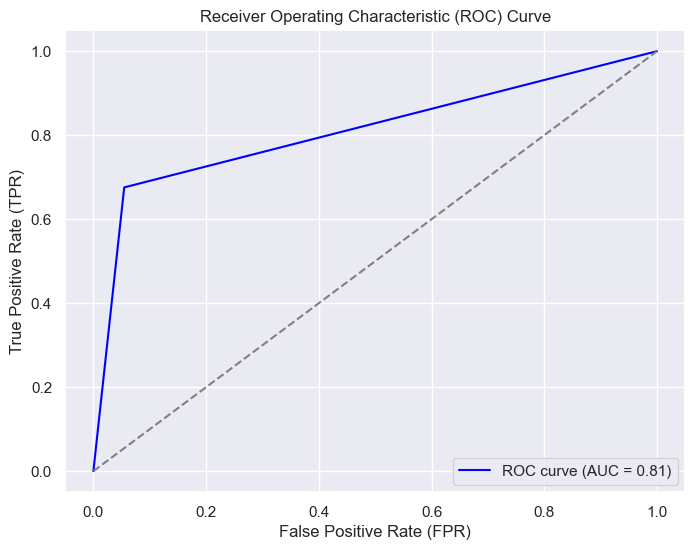

AUC: 0.81


In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_val, y_val_pred)

# Calculate the AUC
auc = roc_auc_score(y_val, y_val_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, print AUC
print(f"AUC: {auc:.2f}")


# Interpretation

## Getting the feature importance detected by random forest

In [80]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[1]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(data_train.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,marital-status_ Married-civ-spouse,0.136925
1,capital-gain,0.102263
2,age,0.100958
3,education-num,0.100553
4,relationship_ Husband,0.093712


## Plotting the Feature Importance

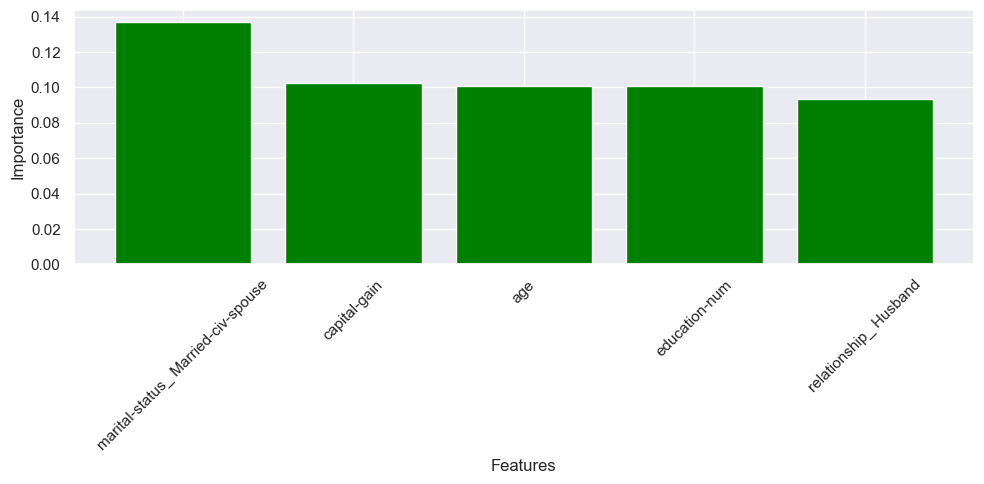

In [82]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=45)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()

# Conclusion